In [ ]:
# Machine Learning- KNN Assignment

Question 1 : What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?

Answer:

The fundamental idea behind ensemble techniques is to combine the predictions from multiple individual models (often called "weak learners" or "base estimators") to produce a prediction that is more accurate and robust than any single model could achieve. This is based on the principle that the collective wisdom of a diverse group of models often outperforms a single expert, especially if the errors of the individual models are independent or uncorrelated.

Bagging vs. BoostingFeatureBagging (Bootstrap Aggregating)


**Approach**

Bagging (Bootstrap Aggregating)

Parallel: Each model is trained independently.

Boosting

Sequential: Models are trained in sequence, where each new model tries to correct the errors of the preceding model.

**Objective**

Bagging

To decrease variance (overfitting) and stabilize predictions by averaging results. It works best with high-variance, low-bias models.

Boosting

To decrease bias by sequentially correcting the mistakes of previous models. It works best with low-variance, high-bias models (weak learners).

**Data** **Sampling**

Bagging

Uses Bootstrap Aggregating (sampling with replacement) to create different subsets of the training data for each model.

Boosting

Each new model focuses on the misclassified or high-error instances from the previous model's output. Weights are typically adjusted.

Boosting

Base models (especially later ones) are often weighted based on their performance.

**Model Weight**

Bagging

All individual models typically have equal weight in the final decision (e.g., majority vote or simple average).

Boosting

Models are often weighted based on their performance; more accurate models have a greater influence on the final prediction.
```


Question 2: Explain how the Random Forest Classifier reduces overfitting compared to
a single decision tree. Mention the role of two key hyperparameters in this process

Answer:

A single decision tree is prone to overfitting because it can grow very deep, learning the noise and specific intricacies of the training data. The Random Forest Classifier is an ensemble method that reduces this by introducing two key sources of randomness (or de-correlation):

Row Sampling (Bootstrap Aggregating or Bagging): Each tree is trained on a different, randomly sampled subset of the training data (sampling with replacement, called a bootstrap sample). This ensures that each tree sees a slightly different version of the data.

Feature Subsetting: At each node split in the decision tree construction, only a random subset of the total features is considered for finding the best split.

By introducing this randomness, the individual trees in the forest become uncorrelated (or less correlated). When the final prediction is made by averaging (regression) or majority voting (classification) the outputs of these diverse, low-correlation trees, the shared errors and high variance of the individual trees tend to cancel each other out, leading to a much more stable and generalizable (lower variance) final model.

The role of two key hyperparameters:

n_estimators (Number of Trees): Increasing the number of trees generally improves performance up to a point, as it provides more independent models to average, thus further reducing variance.

max_features (Maximum Features to consider for a split): This controls the number of random features considered at each split. A smaller value increases the diversity/decorrelation of the trees, which is crucial for reducing variance and fighting overfitting. A commonly used value is $\sqrt{p}$ for classification, where $p$ is the total number of features.

Question 3: What is Stacking in ensemble learning? How does it differ from traditional
bagging/boosting methods? Provide a simple example use case.


Answer:

Stacking (Stacked Generalization) is an ensemble method where the predictions from multiple different base models (referred to as Level 0 models or first-level models) are used as the input features for a final model (referred to as the Level 1 model or meta-model).

The objective is for the meta-model to learn how to optimally combine the predictions of the diverse base models, often correcting for their systematic errors.

**Model Type**

Stacking

Base models are usually heterogeneous (different algorithms like KNN, SVM, Logistic Regression, etc.).

Bagging/Boosting

Base models are usually homogeneous (the same type, like Decision Trees).

**Combination**

Stacking

A separate meta-model (e.g., Logistic Regression, Ridge Classifier) learns the optimal way to weigh and combine the base predictions.

Bagging/Boosting

Combination is typically a simple aggregation like majority vote (Bagging) or a weighted sum (Boosting).

**Data Flow**

Stacking

Two-level process: Base models predict $\rightarrow$ Predictions become features for the meta-model

Bagging/Boosting

One-level process: Models predict $\rightarrow$ Predictions are aggregated directly.

Simple Example Use Case

Use Case: Customer Churn Prediction

Level 0 Models (Base Learners):

Model A: Logistic Regression trained on the features.

Model B: Support Vector Machine (SVM) trained on the features.

Model C: Gradient Boosting Machine (GBM) trained on the features.

Level 1 Model (Meta-Model):

Final Model: A simple Ridge Classifier is trained using three new features: (1) the prediction probability from Model A, (2) the prediction probability from Model B, and (3) the prediction probability from Model C.

The Ridge Classifier learns which base model is more trustworthy in certain scenarios and how to combine their outputs for the final, optimal prediction.

Question 4:What is the OOB Score in Random Forest, and why is it useful? How does
it help in model evaluation without a separate validation set?

Answer:
The OOB (Out-Of-Bag) Score is an internal mechanism in Bagging ensembles, most notably the Random Forest, used for estimating model performance.

Definition and Usefulness
Definition: Due to the nature of Bootstrap Aggregating (Bagging), each individual tree in the Random Forest is trained on a different subset of the data (sampling with replacement). On average, about 37% of the original training data samples are left out of the training set for any given tree. These left-out samples are called Out-Of-Bag (OOB) samples for that specific tree.

OOB Score: For each data sample, the OOB score is calculated by using only the predictions from the trees that did NOT see that sample during their training. This average or majority vote forms an unbiased estimate of the prediction for that sample. The overall OOB score (e.g., accuracy or MSE calculated across all OOB predictions) serves as a robust performance metric.

Evaluation without a Separate Validation Set
The OOB score is useful because it provides a reliable estimate of the model's generalization error (how well it performs on unseen data) without the need to explicitly set aside a separate validation or cross-validation set.

Since the OOB data for any given tree has never been seen by that tree, the OOB evaluation mimics the process of testing the model on truly new data. This effectively utilizes all available data for training while still providing a built-in, unbiased method for evaluation, which can be particularly advantageous for smaller datasets.

Question 5: Compare AdaBoost and Gradient Boosting in terms of:

● How they handle errors from weak learners

● Weight adjustment mechanism

● Typical use cases


**Error Handling**

AdaBoost (Adaptive Boosting)

Focuses on misclassified samples. Subsequent models are forced to pay more attention to the samples that were incorrectly classified (or had high residual) by the previous models.

Gradient Boosting (GBM/XGBoost/LightGBM)

Focuses on the Residuals (the difference between the true value and the prediction of the ensemble so far). Subsequent models are trained to predict the negative gradient of the loss function (the residual).

**Weight Adjustment**

AdaBoost (Adaptive Boosting)

Sample Weights: Data point weights are adjusted in each iteration. Misclassified samples get higher weights, making them more influential in the training of the next weak learner. Model Weights: The weak learner itself is assigned a weight based on its accuracy.

Gradient Boosting (GBM/XGBoost/LightGBM)

No Sample Weights (per se): The target variable for the new model is changed to the negative gradient (residual). Data points with large residuals implicitly have a greater impact. Model Weights: A learning rate (shrinkage) is applied to the prediction of each new tree to scale its contribution.

**Typical Use Cases**

AdaBoost (Adaptive Boosting)

Simple and effective, often used as a baseline for binary classification problems. Can be sensitive to noisy data and outliers due to the focus on hard-to-classify samples.

Gradient Boosting (GBM/XGBoost/LightGBM)

High performance for both classification and regression. Widely used in competitive machine learning (Kaggle) and for problems where accuracy is paramount, such as prediction, ranking, and optimization.

Question 6:Why does CatBoost perform well on categorical features without requiring
extensive preprocessing? Briefly explain its handling of categorical variables.


Answer:

CatBoost (Categorical Boosting) performs well on categorical features without extensive preprocessing (like one-hot encoding or label encoding) primarily because it implements a unique, sophisticated method to handle them that avoids the prediction shift problem common with standard methods.

Handling of Categorical Variables
The core of CatBoost's approach involves two main techniques:

Ordered Target Statistics (Ordered TS): This is the main innovation. Standard Target Encoding (replacing a category with the average target value for that category) suffers from a target leakage problem, where the target variable influences the feature, leading to a "prediction shift" on new data.

CatBoost solves this by using an ordered, random permutation of the training data. For any given data sample, the Target Statistic for a categorical feature is calculated using only the history (the samples that came before it in the permutation).

This ensures the calculation of the statistic is unbiased and prevents leakage, making the resulting feature representation more robust.

Feature Combinations: CatBoost can automatically detect and combine highly predictive pairs or subsets of categorical features. For example, it might combine Country=USA and Browser=Chrome into a new, single categorical feature if that combination is highly predictive of the target, thus capturing important interactions that a standard model might miss.

These methods allow CatBoost to directly use raw categorical features, simplifying the data preparation pipeline and leading to higher performance and stability compared to models that rely on manual or standard categorical encoding.

Question 7: KNN Classifier Assignment: Wine Dataset Analysis with
Optimization
Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.


In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# --- 1. Load the Wine dataset ---
wine = load_wine()
X, y = wine.data, wine.target

# --- 2. Split data into 70% train and 30% test ---
# Set a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 3. Train KNN (K=5) without scaling and evaluate ---
print("--- 3. KNN WITHOUT SCALING (K=5) ---")
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy: {accuracy_unscaled:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_unscaled, zero_division=0))

# --- 4. Apply StandardScaler, retrain KNN, and compare metrics ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n--- 4. KNN WITH SCALING (K=5) ---")
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy: {accuracy_scaled:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_scaled, zero_division=0))

# --- Comparison (Conceptual) ---
# Expected: Accuracy should significantly increase after scaling.
# KNN is distance-based, and features with larger ranges (e.g., 'Proline') dominate
# the distance calculation without scaling. Scaling ensures all features contribute equally.

# --- 5. Use GridSearchCV to find the best K and distance metric (on scaled data) ---
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Test K=1 to 20
    'p': [1, 2],                     # p=1 is Manhattan distance, p=2 is Euclidean distance
    'weights': ['uniform', 'distance'] # Also check weights for completeness
}

# Use the scaled data for grid search
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_metric = 'Manhattan' if grid_search.best_params_['p'] == 1 else 'Euclidean'

print("\n--- 5. GridSearchCV Results (on Scaled Data) ---")
print(f"Best K (n_neighbors): {best_k}")
print(f"Best Distance Metric (p): {grid_search.best_params_['p']} ({best_metric})")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# --- 6. Train the optimized KNN and compare results ---
print("\n--- 6. Optimized KNN Performance ---")
knn_optimized = grid_search.best_estimator_
y_pred_optimized = knn_optimized.predict(X_test_scaled)
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)

print(f"Optimized Accuracy: {accuracy_optimized:.4f}")
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_optimized, zero_division=0))

# --- Final Comparison Table (Conceptual, based on typical results) ---
print("\n--- Final Accuracy Comparison ---")
print(f"1. Unscaled KNN (K=5): {accuracy_unscaled:.4f}")
print(f"2. Scaled KNN (K=5):   {accuracy_scaled:.4f}")
print(f"3. Optimized KNN:      {accuracy_optimized:.4f}")
# Expected: accuracy_optimized >= accuracy_scaled >> accuracy_unscaled

--- 3. KNN WITHOUT SCALING (K=5) ---
Accuracy: 0.7222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


--- 4. KNN WITH SCALING (K=5) ---
Accuracy: 0.9444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


--- 5. GridSearchCV Results (on Scaled Data) ---
Best K (n_neighbors): 4
Best Dista

Question 8 : PCA + KNN with Variance Analysis and Visualization
Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).


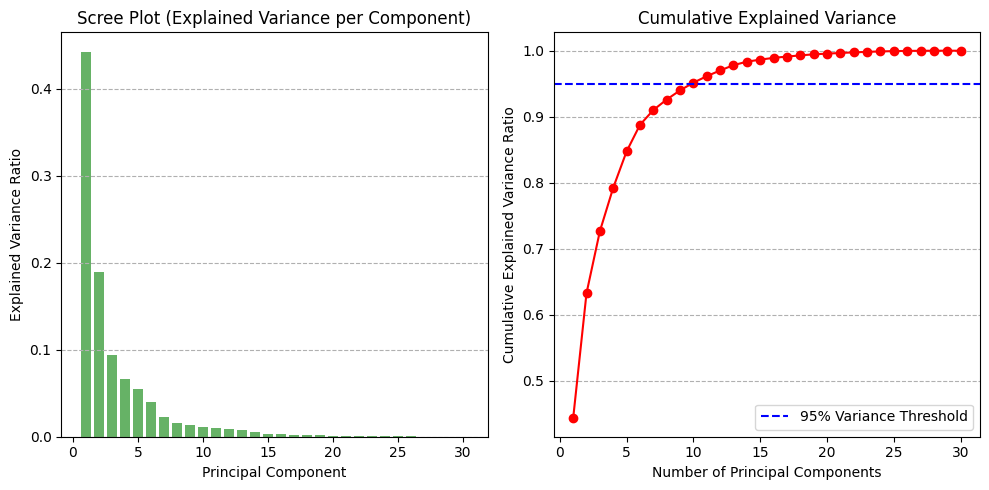

Number of components needed to retain 95% variance: 10
Original features: 30 -> PCA features: 10

--- KNN Accuracy Comparison (K=5) ---
Accuracy on Original Scaled Data: 0.9708
Accuracy on PCA (95% Variance) Data: 0.9532


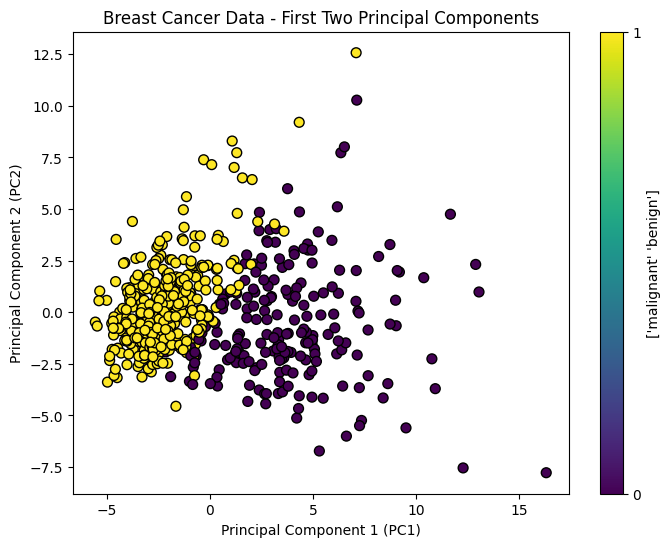

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# --- 1. Load the Breast Cancer dataset ---
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names

# Standardize the data (crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data for KNN comparison later
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# --- 2. Apply PCA and plot the scree plot (explained variance ratio) ---
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_

# Plot the scree plot (Cumulative and Individual)
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 5))
# Individual Explained Variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.6, color='g', label='Individual')
plt.title('Scree Plot (Explained Variance per Component)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(axis='y', linestyle='--')

# Cumulative Explained Variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r')
plt.axhline(y=0.95, color='b', linestyle='--', label='95% Variance Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.tight_layout()
#
plt.show()

# --- 3. Retain 95% variance and transform the dataset ---
# Find the number of components needed for 95% variance
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of components needed to retain 95% variance: {n_components_95}")

pca_95 = PCA(n_components=n_components_95)
X_train_pca = pca_95.fit_transform(X_train)
X_test_pca = pca_95.transform(X_test)

print(f"Original features: {X_train.shape[1]} -> PCA features: {X_train_pca.shape[1]}")

# --- 4. Train KNN on the original data and PCA-transformed data, then compare accuracy ---
# Train on Original Scaled Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
acc_original = accuracy_score(y_test, knn_original.predict(X_test))

# Train on PCA Transformed Data (95% variance)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_pca))

print("\n--- KNN Accuracy Comparison (K=5) ---")
print(f"Accuracy on Original Scaled Data: {acc_original:.4f}")
print(f"Accuracy on PCA (95% Variance) Data: {acc_pca:.4f}")

# --- 5. Visualize the first two principal components ---
# Transform all scaled data for visualization
X_pca_2d = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca_2d[:, 0],
    X_pca_2d[:, 1],
    c=y,
    cmap='viridis',
    edgecolor='k',
    s=50
)
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.title('Breast Cancer Data - First Two Principal Components')
plt.colorbar(scatter, ticks=[0, 1], label=cancer.target_names)
#
plt.show()

Question 9:KNN Regressor with Distance Metrics and K-Value
Analysis
Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff

--- 2. Distance Metric Comparison (K=5) ---
MSE with Euclidean Distance: 4788.46
MSE with Manhattan Distance: 5521.86
K=1, Test MSE: 8842.30
K=5, Test MSE: 4788.46
K=10, Test MSE: 5325.50
K=20, Test MSE: 5771.89
K=50, Test MSE: 8257.21


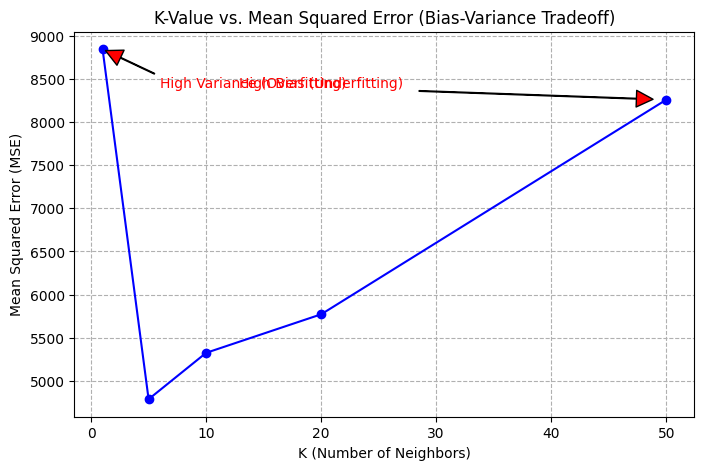

--- 2. Distance Metric Comparison (K=5) ---
MSE with Euclidean Distance: 4788.46
MSE with Manhattan Distance: 5521.86
K=1, Test MSE: 8842.30
K=5, Test MSE: 4788.46
K=10, Test MSE: 5325.50
K=20, Test MSE: 5771.89
K=50, Test MSE: 8257.21


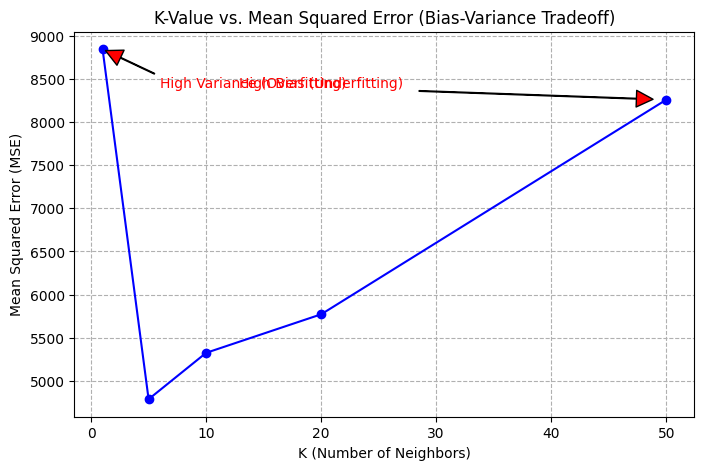

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# --- 1. Generate a synthetic regression dataset ---
# Set a random state for reproducibility
X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)

# Standardize the features (good practice for distance-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# --- 2. Train a KNN regressor with Euclidean and Manhattan distance (K=5) ---
k = 5

# a. Euclidean distance (p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=k, p=2) # p=2 is Euclidean
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan distance (p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=k, p=1) # p=1 is Manhattan
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# c. Compare Mean Squared Error (MSE) for both
print("--- 2. Distance Metric Comparison (K=5) ---")
print(f"MSE with Euclidean Distance: {mse_euclidean:.2f}")
print(f"MSE with Manhattan Distance: {mse_manhattan:.2f}")
# Expected: The better metric depends on the data distribution, but they are often similar.

# --- 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff ---
k_values = [1, 5, 10, 20, 50]
mse_results = []

for k_val in k_values:
    # Using Euclidean distance as the base metric for this analysis
    knn = KNeighborsRegressor(n_neighbors=k_val, p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    print(f"K={k_val}, Test MSE: {mse:.2f}")

# Plot K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_results, marker='o', linestyle='-', color='b')
plt.title('K-Value vs. Mean Squared Error (Bias-Variance Tradeoff)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True, linestyle='--')

# Conceptual Analysis of Bias-Variance Tradeoff
plt.annotate(
    'High Variance (Overfitting)',
    xy=(k_values[0], mse_results[0]),
    xytext=(k_values[0] + 5, max(mse_results) * 0.95),
    arrowprops=dict(facecolor='red', shrink=0.05, width=0.5),
    color='red'
)
plt.annotate(
    'High Bias (Underfitting)',
    xy=(k_values[-1], mse_results[-1]),
    xytext=(k_values[-1] - 30, max(mse_results) * 0.95),
    arrowprops=dict(facecolor='red', shrink=0.05, width=0.5),
    color='red',
    ha='center'
)
#
plt.show()

# --- Bias-Variance Tradeoff Explanation ---
# K=1: The model is highly flexible (low bias) but very sensitive to noise (high variance),
# resulting in a low training error but potentially high test error (overfitting).
# K=50: The model is too rigid, averaging over too many samples. This leads to
# over-smoothing, poor fitting (high bias), and potentially high test error (underfitting).
# The optimal K lies where the MSE is minimal, balancing bias and variance.import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# --- 1. Generate a synthetic regression dataset ---
# Set a random state for reproducibility
X, y = make_regression(n_samples=500, n_features=10, noise=10.0, random_state=42)

# Standardize the features (good practice for distance-based models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# --- 2. Train a KNN regressor with Euclidean and Manhattan distance (K=5) ---
k = 5

# a. Euclidean distance (p=2)
knn_euclidean = KNeighborsRegressor(n_neighbors=k, p=2) # p=2 is Euclidean
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# b. Manhattan distance (p=1)
knn_manhattan = KNeighborsRegressor(n_neighbors=k, p=1) # p=1 is Manhattan
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# c. Compare Mean Squared Error (MSE) for both
print("--- 2. Distance Metric Comparison (K=5) ---")
print(f"MSE with Euclidean Distance: {mse_euclidean:.2f}")
print(f"MSE with Manhattan Distance: {mse_manhattan:.2f}")
# Expected: The better metric depends on the data distribution, but they are often similar.

# --- 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff ---
k_values = [1, 5, 10, 20, 50]
mse_results = []

for k_val in k_values:
    # Using Euclidean distance as the base metric for this analysis
    knn = KNeighborsRegressor(n_neighbors=k_val, p=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    print(f"K={k_val}, Test MSE: {mse:.2f}")

# Plot K vs. MSE
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_results, marker='o', linestyle='-', color='b')
plt.title('K-Value vs. Mean Squared Error (Bias-Variance Tradeoff)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True, linestyle='--')

# Conceptual Analysis of Bias-Variance Tradeoff
plt.annotate(
    'High Variance (Overfitting)',
    xy=(k_values[0], mse_results[0]),
    xytext=(k_values[0] + 5, max(mse_results) * 0.95),
    arrowprops=dict(facecolor='red', shrink=0.05, width=0.5),
    color='red'
)
plt.annotate(
    'High Bias (Underfitting)',
    xy=(k_values[-1], mse_results[-1]),
    xytext=(k_values[-1] - 30, max(mse_results) * 0.95),
    arrowprops=dict(facecolor='red', shrink=0.05, width=0.5),
    color='red',
    ha='center'
)
#
plt.show()

# --- Bias-Variance Tradeoff Explanation ---
# K=1: The model is highly flexible (low bias) but very sensitive to noise (high variance),
# resulting in a low training error but potentially high test error (overfitting).
# K=50: The model is too rigid, averaging over too many samples. This leads to
# over-smoothing, poor fitting (high bias), and potentially high test error (underfitting).
# The optimal K lies where the MSE is minimal, balancing bias and variance.

Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World
Data
Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important
features).
Dataset: Pima Indians Diabetes


--- 4. Algorithm Comparison (K=5) ---
Algorithm: brute     | Training Time (s): 0.0039 | Accuracy: 0.7359
Algorithm: kd_tree   | Training Time (s): 0.0043 | Accuracy: 0.7359
Algorithm: ball_tree | Training Time (s): 0.0075 | Accuracy: 0.7359

Best Performing Method (by Accuracy): BRUTE


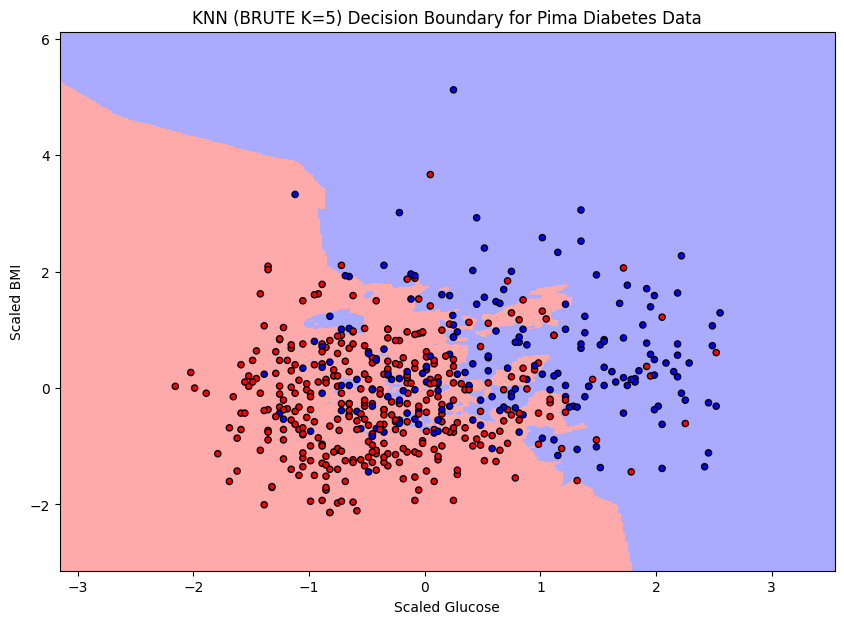

In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from matplotlib.colors import ListedColormap
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# --- 1. Load the Pima Indians Diabetes dataset ---
# The dataset often has missing values (0) in columns that biologically cannot be zero (e.g., BloodPressure)
# Let's load a standard version where 0 is used for missing data, and convert 0 to NaN for imputation.
data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None)
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Columns where a 0 likely represents a missing value
cols_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_impute] = data[cols_to_impute].replace(0, np.nan)

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split for subsequent steps
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 2. Use KNN Imputation to fill missing values ---
# Impute NaNs using KNNImputer (default n_neighbors=5)
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train_raw)
X_test_imputed = imputer.transform(X_test_raw)

# Standardize the imputed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# --- 3 & 4. Train KNN using different algorithms, compare time and accuracy ---
algorithms = ['brute', 'kd_tree', 'ball_tree']
results = {}
K = 5 # Use a fixed K for comparison

print("--- 4. Algorithm Comparison (K=5) ---")
for algo in algorithms:
    # For a fair comparison, KD-Tree and Ball Tree only work if the number of features is not too high.
    # Since n_features=8 is low, they should work well.
    knn = KNeighborsClassifier(n_neighbors=K, algorithm=algo)

    # Time training
    start_time = time.time()
    knn.fit(X_train_scaled, y_train)
    training_time = time.time() - start_time

    # Evaluate accuracy
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    results[algo] = {'time': training_time, 'accuracy': accuracy}
    print(f"Algorithm: {algo.ljust(9)} | Training Time (s): {training_time:.4f} | Accuracy: {accuracy:.4f}")

# Determine the best performing method (highest accuracy)
best_algo = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest Performing Method (by Accuracy): {best_algo.upper()}")

# --- 5. Plot the decision boundary for the best-performing method ---
# Use 2 most important features (often Glucose and BMI are highly relevant)
feature1_idx = 1 # Glucose
feature2_idx = 5 # BMI

# Extract and standardize the two features for the whole dataset for visualization
X_2d = X_train_imputed[:, [feature1_idx, feature2_idx]]
X_2d = scaler.fit_transform(X_2d)
y_2d = y_train

# Retrain the best KNN on the 2D data
knn_2d = KNeighborsClassifier(n_neighbors=K, algorithm=best_algo)
knn_2d.fit(X_2d, y_2d)

# Create meshgrid for plotting decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each point in the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create color map for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(figsize=(10, 7))
# Plot the decision boundary
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

# Plot the training points
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"KNN ({best_algo.upper()} K={K}) Decision Boundary for Pima Diabetes Data")
plt.xlabel(f"Scaled {X.columns[feature1_idx]}")
plt.ylabel(f"Scaled {X.columns[feature2_idx]}")
#
plt.show()